In [2]:
from helper_functions import *
import numpy as np

# General plan

We will do the displacement of all points without the first order approximation and compare results. What this means is that we will displace a copy of the curve at every point and then find the changes in curvature and metric. As opposed to displacing the curve at each point, finding the metric and curvature differences, and then adding up the results of separate independent displacements (which is correct only to first order).

## First let's create these displacements

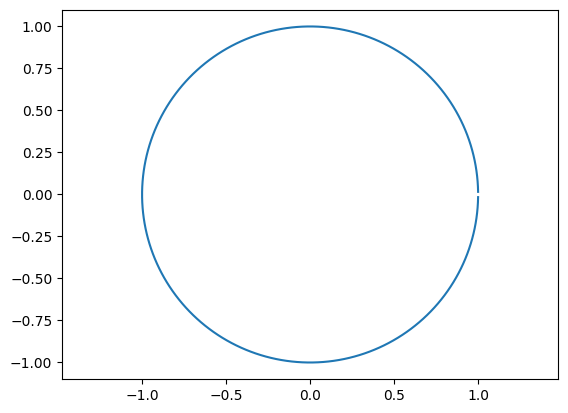

In [119]:
"""
Example curve
"""

N_points = 200
R = 1
thetaspan = 2 * np.pi

thetas = np.linspace(0, thetaspan * (N_points-1)/(N_points), N_points)
thetas = thetas + thetaspan / N_points / 2


xs = R * np.cos(thetas)
ys = R * np.sin(thetas)

curve = np.array([xs, ys]).T

plt.plot(xs, ys)
plt.axis('equal')
plt.show()

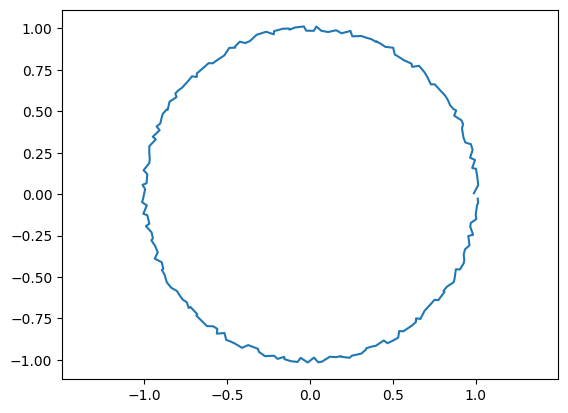

In [ ]:
"""
Creating one displaced curve
"""

#Ok time to plate. Make sure forces are in perp direction, populate forces in the same way
step = 2 * np.pi * R / N_points
step_theta = 2 * np.pi / N_points

epsilon = step * 0.5


#bug fix: this - 0.5 makes all the difference
vdisps_whole = np.random.rand(len(curve), 2) - 0.5
#CHANGE 1: NORMALIZING THE DISPLACEMENTS: no problem (even more regular it seems)
vdisps_whole = vdisps_whole / np.linalg.norm(vdisps_whole, axis=1)[:, None]
vdisps_whole = vdisps_whole * epsilon

curve_copy = curve.copy()

for i, point in enumerate(curve):
    point = point + vdisps_whole[i]
    curve_copy[i] = point

plt.plot(curve_copy[:, 0], curve_copy[:, 1])
plt.axis('equal')
plt.show()

Quite an important realisation!!!. The way I was doing displacements was not spherically symmetric. For some reason the random numbers I chose were between 0 and 1 for the x displacements and the same for y. They should have been between plus and minus 1/2 eg. This was giving some sinusoidal signal which was confounding the overall signal.

In [131]:
#Ok time to plate. Make sure forces are in perp direction, populate forces in the same way
def gen_disp_curves(curve, L, prec=1e-7):
    output = np.zeros((2 * len(curve), len(curve), 2))

    step_theta = L / N_points
    epsilon = step_theta * prec

    #for clarity, an entry is an entire displaced curve
    for i, entry in enumerate(output):
        #bug fix: this - 0.5 makes all the difference
        vdisps_whole = np.random.rand(len(curve), 2) - 0.5
        #CHANGE 1: NORMALIZING THE DISPLACEMENTS: no problem (even more regular it seems)
        vdisps_whole = vdisps_whole / np.linalg.norm(vdisps_whole, axis=1)[:, None]
        vdisps_whole = vdisps_whole * epsilon

        curve_copy = curve.copy()

        for j, point in enumerate(curve):
            point = point + vdisps_whole[j]
            curve_copy[j] = point

        output[i] = curve_copy

    return output

disp_curves = gen_disp_curves(curve, 2*np.pi)

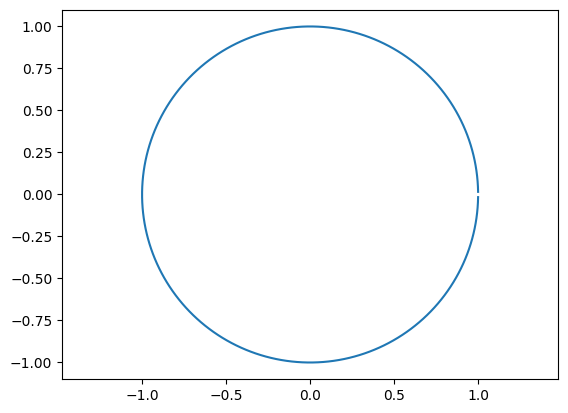

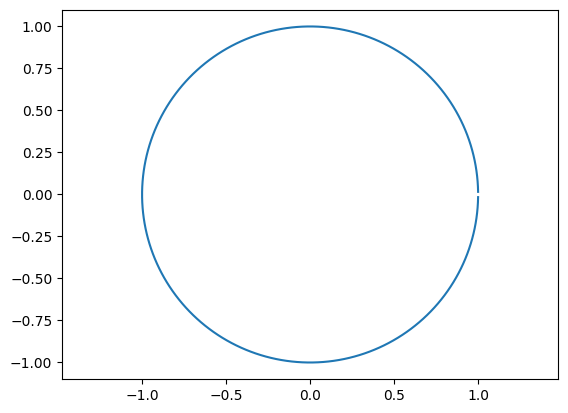

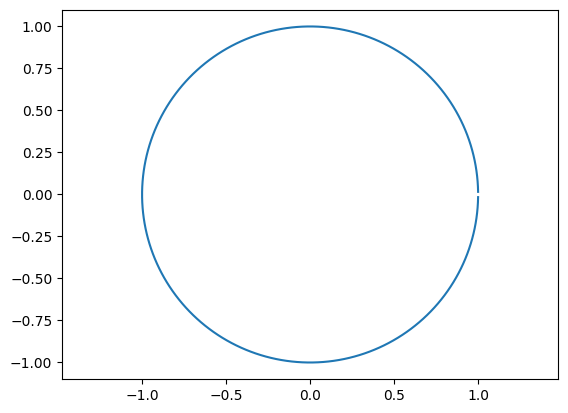

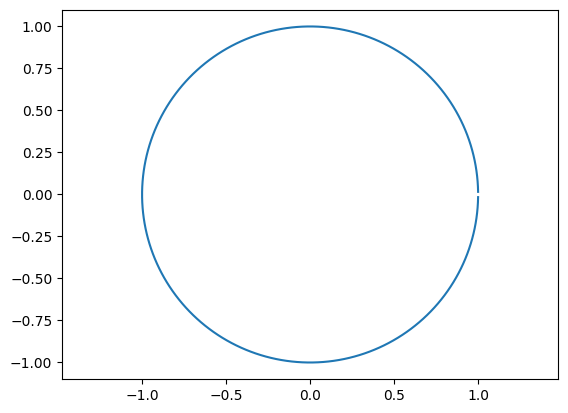

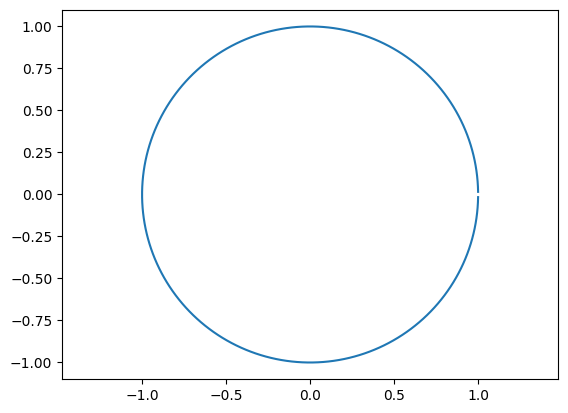

In [132]:
for i in range(5):
    plt.plot(disp_curves[i][:, 0], disp_curves[i][:, 1])
    plt.axis('equal')
    plt.show()

## Next, let's move on to calculating the matrix

In [ ]:
def populate_matrix_set(curve, L, prec):
    disp_curves = gen_disp_curves(curve, L, prec)
    
    out = np.zeros((len(disp_curves), len(disp_curves)))

    for i, temp in enumerate(disp_curves):
        for j, _ in enumerate(disp_curves):

            if j % 2 == 0:
                #this term has a dg / 2 
                
            else:
                #this term has -kappa dg / 2 - dkappa